In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

torch.manual_seed(0)

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
boston = load_boston()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
#boston_data = boston.data[:378]

In [8]:
train_X, val_X, train_t, val_t = train_test_split(boston.data, boston.target, test_size=0.25)

In [9]:
train_X.shape, train_t.shape, val_X.shape, val_t.shape

((379, 13), (379,), (127, 13), (127,))

In [10]:
train_X = torch.from_numpy(train_X).float()
val_X =torch.from_numpy(val_X).float()
#train_t = torch.from_numpy(train_t).long()
#val_t = torch.from_numpy(val_t).long()
train_t = torch.from_numpy(train_t).float()
val_t = torch.from_numpy(val_t).float()

In [11]:
train = TensorDataset(train_X, train_t) # 説明変数と目的変数のデータセットを作る

In [12]:
train[0]

(tensor([3.1636e+00, 0.0000e+00, 1.8100e+01, 0.0000e+00, 6.5500e-01, 5.7590e+00,
         4.8200e+01, 3.0665e+00, 2.4000e+01, 6.6600e+02, 2.0200e+01, 3.3440e+02,
         1.4130e+01]),
 tensor(19.9000))

In [13]:
batch_size = 16
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True)

In [14]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=13, out_features=32)
        self.fc2 = nn.Linear(in_features=32, out_features=16)
        self.fc3 = nn.Linear(in_features=16, out_features=1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [15]:
model = Net()
model.to(device)

Net(
  (fc1): Linear(in_features=13, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)

In [16]:
#criterion = nn.CrossEntropyLoss()                   # 損失関数(分類問題なのでCrossEntropyLossを使う)
criterion = nn.MSELoss()                   # 損失関数(回帰問題なので平均2乗誤差を使う)
#optimizer = optim.SGD(model.parameters(), lr=0.001) # 活性化関数 # weight_decay L2正則化（※不要な場合は0か省略）
#optimizer = optim.RMSprop(model.parameters(), lr=0.01, weight_decay=0) # 活性化関数 # weight_decay L2正則化（※不要な場合は0か省略）
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0)

In [17]:
epochs = 200

total_train_losses = []
#total_train_accus = []
total_valid_losses = []
#total_valid_accus = []

for epoch in range(epochs):
    train_loss = 0.0
    #train_acc = 0.0
    train_losses = []
    #train_accs = []
    valid_loss = 0.0
    valid_losses = []
    
    model.train()
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(X)
        #print('output: ', output)
        #print('y: ', y.unsqueeze(dim=-1))
        loss = criterion(output, y.unsqueeze(dim=-1))
        
        #print('loss:', loss.item())
        train_losses.append(loss.item())
        #train_loss += loss.item()
        #pred = torch.argmax(output, dim=1)
        #train_acc += torch.mean(pred.eq(y).float()).item()
        
        loss.backward()
        optimizer.step()
        
    train_loss = np.mean(train_losses)
    total_train_losses.append(train_loss)
    #train_accs = np.mean(train_acc)

    model.eval()
    with torch.no_grad(): # 勾配計算なし
        vX, vt = val_X.to(device), val_t.to(device)
        output_val = model(vX)
        loss_val = criterion(output_val, vt)
        
        valid_losses.append(loss_val.item())

    #print(np.mean(loss_val.item()))
    valid_loss = np.mean(loss_val.item())    
    total_valid_losses.append(valid_loss)

    if epoch % 10 == 0:
        print('epoch: {}, train: [loss: {:.3f}], test: [loss: {:.3f}]'.format(epoch, train_loss, np.mean(valid_losses)))


/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([127])) that is different to the input size (torch.Size([127, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0, train: [loss: 159.494], test: [loss: 76.061]
epoch: 10, train: [loss: 39.508], test: [loss: 110.221]
epoch: 20, train: [loss: 25.161], test: [loss: 119.793]
epoch: 30, train: [loss: 24.143], test: [loss: 126.115]
epoch: 40, train: [loss: 25.033], test: [loss: 102.794]
epoch: 50, train: [loss: 19.703], test: [loss: 119.217]
epoch: 60, train: [loss: 20.498], test: [loss: 119.045]
epoch: 70, train: [loss: 25.193], test: [loss: 166.519]
epoch: 80, train: [loss: 20.069], test: [loss: 115.341]
epoch: 90, train: [loss: 16.652], test: [loss: 120.155]
epoch: 100, train: [loss: 22.025], test: [loss: 108.979]
epoch: 110, train: [loss: 22.365], test: [loss: 100.283]
epoch: 120, train: [loss: 23.825], test: [loss: 105.205]
epoch: 130, train: [loss: 17.169], test: [loss: 123.361]
epoch: 140, train: [loss: 17.217], test: [loss: 128.846]
epoch: 150, train: [loss: 16.475], test: [loss: 124.864]
epoch: 160, train: [loss: 17.539], test: [loss: 110.314]
epoch: 170, train: [loss: 16.986], test: [

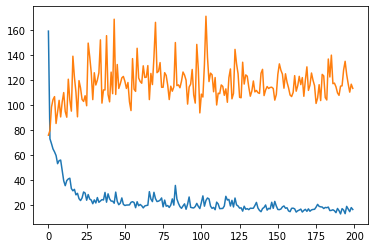

In [18]:
plt.plot(total_train_losses)
plt.plot(total_valid_losses)